# 🌱 Desafio: Análise de Dados de Irrigação com Regressão Linear

In [1]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from scipy.stats import shapiro, kstest, probplot
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from statsmodels.graphics.gofplots import qqplot
import joblib
import pingouin as pg


1. **Carregar e Visualizar os Dados:**
    - Carregue os dados de irrigação a partir de um arquivo CSV.
    - Visualize os dados para entender a estrutura e as variáveis disponíveis.

In [2]:
dados_de_irrigacao = pd.read_csv('./datasets/dados_de_irrigacao.csv')

df_irrigacao = pd.DataFrame(dados_de_irrigacao)


In [4]:
df_irrigacao.head(5)

,Horas de Irrigação,Área Irrigada,Área Irrigada por Ângulo
0,1,100,66.666667
1,2,200,133.333333
2,3,300,200.000000
3,4,400,266.666667
4,5,500,333.333333


In [6]:
df_irrigacao.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 299 entries, 0 to 298
Data columns (total 3 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   Horas de Irrigação        299 non-null    int64  
 1   Área Irrigada             299 non-null    int64  
 2   Área Irrigada por Ângulo  299 non-null    float64
dtypes: float64(1), int64(2)
memory usage: 7.1 KB


In [9]:
df_irrigacao.columns = [
    'horas_de_irrigacao',
    'area_irrigada',
    'area_irrigada_angulo'
]

2. **Análise Exploratória dos Dados (EDA):**
    - Calcule as estatísticas descritivas das variáveis.
    - Crie gráficos de dispersão para visualizar a relação entre as horas de irrigação e a área irrigada por ângulo.
    - Analise a correlação entre as variáveis.

In [10]:
df_irrigacao.describe()

,horas_de_irrigacao,area_irrigada,area_irrigada_angulo
count,299.000000,299.000000,299.000000
mean,150.000000,15000.000000,10000.000000
std,86.458082,8645.808233,5763.872155
min,1.000000,100.000000,66.666667
25%,75.500000,7550.000000,5033.333333
50%,150.000000,15000.000000,10000.000000
75%,224.500000,22450.000000,14966.666667
max,299.000000,29900.000000,19933.333333


<Axes: xlabel='area_irrigada_angulo', ylabel='horas_de_irrigacao'>

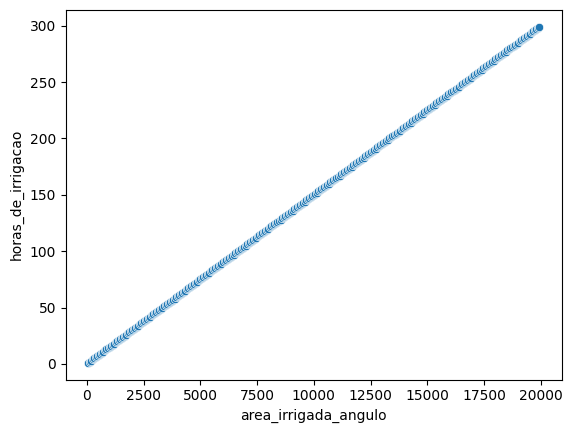

In [11]:
sns.scatterplot(data=df_irrigacao, y='horas_de_irrigacao', x='area_irrigada_angulo')

In [12]:
df_irrigacao.corr('pearson')

,horas_de_irrigacao,area_irrigada,area_irrigada_angulo
horas_de_irrigacao,1.0,1.0,1.0
area_irrigada,1.0,1.0,1.0
area_irrigada_angulo,1.0,1.0,1.0


<Axes: >

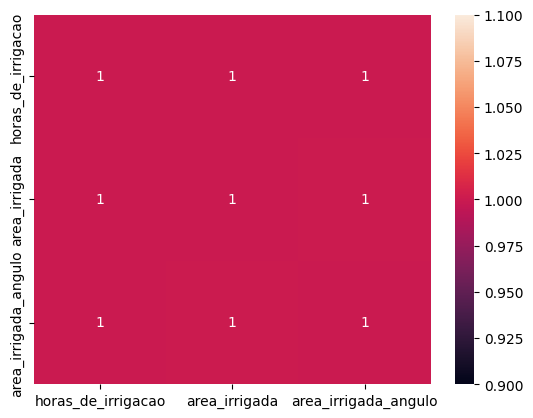

In [13]:
sns.heatmap(data=df_irrigacao.corr('pearson'), annot=True)

3. **Construção do Modelo de Regressão Linear:**
    - Divida os dados em conjuntos de treino e teste.
    - Treine um modelo de regressão linear utilizando as horas de irrigação como variável independente (X) e a área irrigada por ângulo como variável dependente (Y).
    - Imprima a equação da reta obtida pelo modelo.

In [62]:
X = df_irrigacao['horas_de_irrigacao'].values.reshape(-1, 1)
y = df_irrigacao['area_irrigada_angulo'].values.reshape(-1, 1)

X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=42, train_size=0.7)

In [63]:
reg_model = LinearRegression()

y_pred = reg_model.fit(X=X_train, y=y_train)

In [64]:
print('intercept_:', reg_model.intercept_[0])
print('coef_', reg_model.coef_)

intercept_: 1.8189894035458565e-12
coef_ [[66.66666667]]


In [65]:

y_pred = reg_model.predict(X_test)

In [66]:
# Equação da Reta
# y = ax + b
print("A equação da reta é y = {:3f}x + {}".format(reg_model.coef_[0][0], reg_model.intercept_[0]))

A equação da reta é y = 66.666667x + 1.8189894035458565e-12


4. **Avaliação do Modelo:**
    - Utilize as métricas de desempenho (MSE, MAE) para avaliar a precisão do modelo.
    - Visualize os resultados reais e preditos em um gráfico.

In [39]:
from sklearn.metrics import r2_score, mean_absolute_error, mean_squared_error, root_mean_squared_error


In [67]:
mean_absolute_error(y_pred, y_test)

2.5402692295352205e-12

MAE, em media, o erro é de 1.8 area_irrigada_angulo

In [68]:
mean_squared_error(y_pred, y_test)

8.179466345344236e-24

Em media, o quadrado do erro é 5.04 pontos entre 0-100

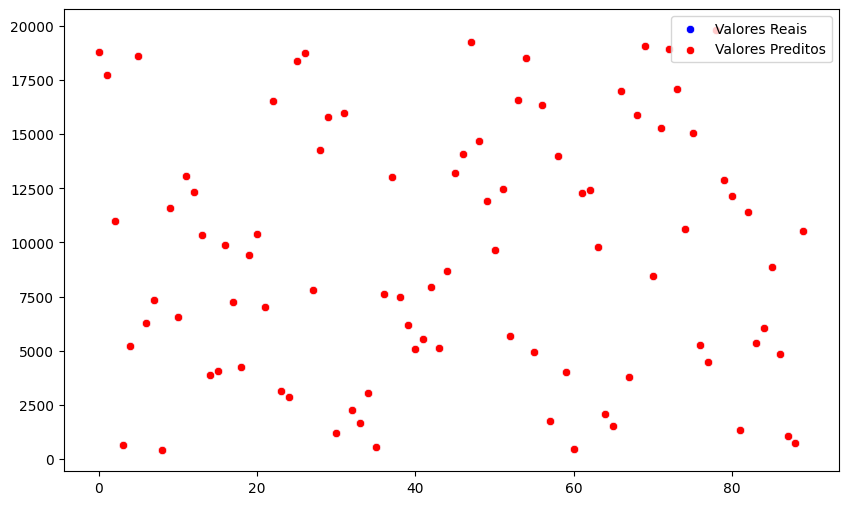

In [69]:
# Analise Grafica - Real x Predito

x_axios = range(len(y_test))

plt.figure(figsize=(10, 6))

sns.scatterplot(x=x_axios, y=y_test.reshape(-1), color='blue', label='Valores Reais')

sns.scatterplot(x=x_axios, y=y_pred.reshape(-1), color='red', label='Valores Preditos')

plt.legend()

plt.show()


5. **Análise de Resíduos:**
    - Calcule e analise os resíduos do modelo.
    - Verifique a normalidade dos resíduos utilizando testes estatísticos e gráficos.

In [76]:
residuos =  y_test - y_pred

In [83]:
# Analise de Residuos - Linearlidade 

from scipy.stats import zscore
import numpy as np

# FORMA 1 de calcular residuos padronizados
residuos_std = zscore(residuos) 


# FORMA 2 de calcular residuos padronizados
# Média e desvio padrão dos resíduos
media_res = np.mean(residuos)
desvio_res = np.std(residuos)

# Calcular padronização
residuos_std_manual = (residuos - media_res) / desvio_res



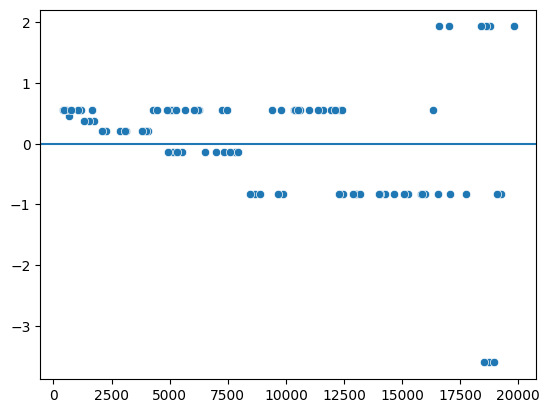

In [89]:
#Verificar linearidade do modelo

sns.scatterplot(x=y_pred.reshape(-1), y=residuos_std_manual.reshape(-1))

plt.axhline(y=0)

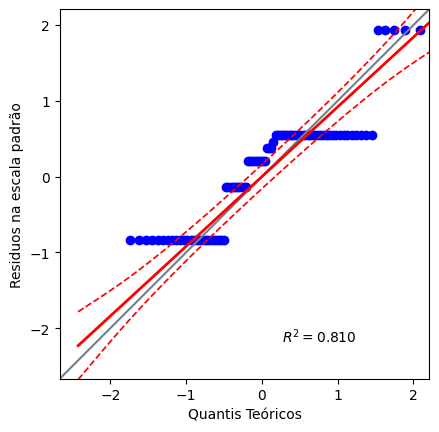

In [90]:
# Checar se resideuos seguem uma distribuição normal
# QQ (Quantile-Quantile) Plt, que avalia de uma amostra se segue uma distribuição normal
import pingouin as pg

pg.qqplot(residuos_std, dist='norm', confidence=0.81)
plt.xlabel('Quantis Teóricos')
plt.ylabel('Residuos na escala padrão')
plt.show()

6. **Predições de Exemplo:**
    - Utilize o modelo para fazer predições. Por exemplo, preveja a área irrigada por ângulo para 15 horas de irrigação.

In [ ]:


horas_exemplo = np.array([[15]])
area_predita = reg_model.predict(horas_exemplo)
print(f"A área irrigada por ângulo para 15 horas de irrigação prevista é: {area_predita[0][0]}")

A área irrigada por ângulo para 15 horas de irrigação prevista é: 1000.0000000000019
